In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
matriz = pd.read_csv("caracteristicas.csv")

# **Clasificación con k-NN**
Entrenamiento y evaluación con un modelo de clasificación K-NN utilizando las características "Acceleration Z(g)_entropy, Acceleration Z(g)_std, Acceleration Z(g)_var, Acceleration Y(g)_std, Acceleration Y(g)_var, Angular velocity Y(°/s)_energy, Angular velocity Y(°/s)_std, Angular velocity Y(°/s)_var, Angular velocity Y(°/s)_MAV, Acceleration Y(g)_entropy" y las etiquetas "AB,ID y SM" del DataFrame `matriz`.

In [8]:
features = ['Acceleration Z(g)_entropy', 'Acceleration Z(g)_std', 'Acceleration Z(g)_var', 'Acceleration Y(g)_std', 'Acceleration Y(g)_var', 'Angular velocity Y(°/s)_energy', 'Angular velocity Y(°/s)_std', 'Angular velocity Y(°/s)_var', 'Angular velocity Y(°/s)_MAV', 'Acceleration Y(g)_entropy']
labels = ['AB', 'ID', 'SM']

X = matriz[features]
y = matriz['label']

filtered_indices = y.isin(labels)
X = X[filtered_indices]
y = y[filtered_indices]

display(X.head())
display(y.head())

,Acceleration Z(g)_entropy,Acceleration Z(g)_std,Acceleration Z(g)_var,Acceleration Y(g)_std,Acceleration Y(g)_var,Angular velocity Y(°/s)_energy,Angular velocity Y(°/s)_std,Angular velocity Y(°/s)_var,Angular velocity Y(°/s)_MAV,Acceleration Y(g)_entropy
0,-483.732766,0.034162,0.001167,0.066830,0.004466,3.586917,1.836488,3.372687,1.118073,-316.917821
1,-82.767462,0.125475,0.015744,0.556339,0.309513,212.708493,14.584070,212.695100,11.248939,-0.381883
2,-31.996221,0.170562,0.029091,0.600577,0.360693,235.630853,15.346993,235.530183,9.995902,4.453460
3,-103.897919,0.106808,0.011408,0.503055,0.253064,162.943681,12.577565,158.195140,10.478523,0.476810
4,-43.636998,0.167010,0.027892,0.614838,0.378025,455.661411,21.142888,447.021704,15.641871,-1.670590


0    AB
1    AB
2    AB
3    AB
4    AB
Name: label, dtype: object

## División de los datos


Los datos se dividieron en conjuntos de entrenamiento y prueba.


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


## Entrenamiento del modelo



In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Evaluación del modelo



In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9916666666666667
Classification Report:
               precision    recall  f1-score   support

          AB       1.00      1.00      1.00        87
          ID       1.00      0.97      0.99        73
          SM       0.98      1.00      0.99        80

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

Confusion Matrix:
 [[87  0  0]
 [ 0 71  2]
 [ 0  0 80]]


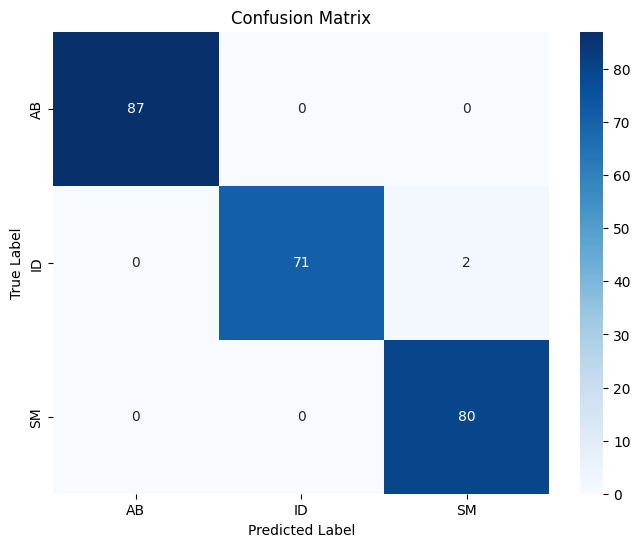

In [13]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Análisis:
 * El modelo K-NN entrenado alcanzó una precisión de 0,9917 en el conjunto de pruebas.
 * La matriz de confusión mostró un bajo número de clasificaciones erróneas, con solo 3 casos clasificados erróneamente de 240 muestras de prueba.

## **Modelo SVM**

In [14]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Evaluación del modelo svm



In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

SVM Accuracy: 0.7333333333333333
SVM Classification Report:
               precision    recall  f1-score   support

          AB       0.95      0.45      0.61        87
          ID       1.00      0.78      0.88        73
          SM       0.56      1.00      0.72        80

    accuracy                           0.73       240
   macro avg       0.84      0.74      0.74       240
weighted avg       0.84      0.73      0.73       240

SVM Confusion Matrix:
 [[39  0 48]
 [ 2 57 14]
 [ 0  0 80]]


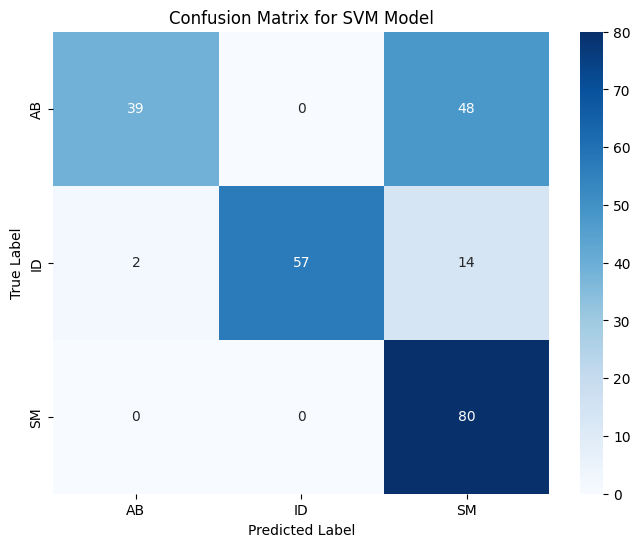

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

## Análisis:

* El modelo SVM alcanzó una precisión de aproximadamente el 70,4 % en los datos de prueba.
* El modelo se inclina mas hacia la clase "ID"
* La visualización de la matriz de confusión para el modelo SVM puso de relieve que las instancias "AB" se clasificaban erróneamente con frecuencia como "SM".

## ** Clasificación logística**

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

c:\Users\Ness\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Evaluación del modelo de regresión logística




In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", report_lr)

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)

Logistic Regression Accuracy: 0.9958333333333333
Logistic Regression Classification Report:
               precision    recall  f1-score   support

          AB       0.99      1.00      0.99        87
          ID       1.00      0.99      0.99        73
          SM       1.00      1.00      1.00        80

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Logistic Regression Confusion Matrix:
 [[87  0  0]
 [ 1 72  0]
 [ 0  0 80]]


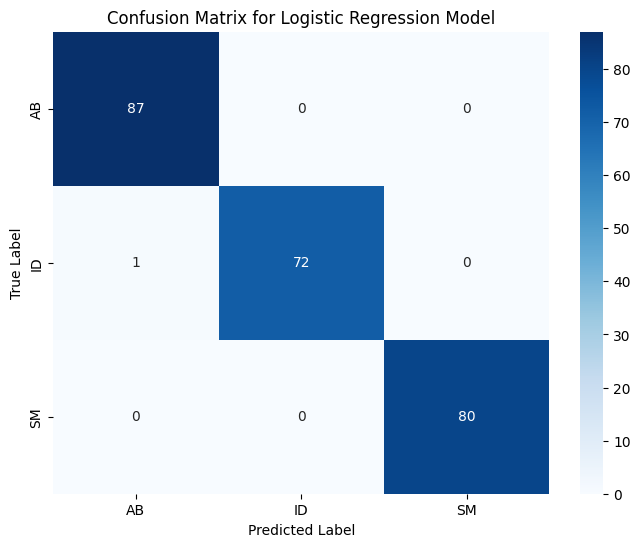

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

### Validación cruzada

In [20]:
from sklearn.model_selection import cross_val_score

# KNN
knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
print("Validación Cruzada KNN:")
print("Scores por fold:", knn_scores)
print("Promedio de accuracy:", knn_scores.mean())

# SVM
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print("\nValidación Cruzada SVM:")
print("Scores por fold:", svm_scores)
print("Promedio de accuracy:", svm_scores.mean())

# Regresión Logística
lr_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("\nValidación Cruzada Regresión Logística:")
print("Scores por fold:", lr_scores)
print("Promedio de accuracy:", lr_scores.mean())


Validación Cruzada KNN:
Scores por fold: [0.97083333 0.97916667 0.99583333 0.99583333 0.95416667]
Promedio de accuracy: 0.9791666666666666

Validación Cruzada SVM:
Scores por fold: [0.5375     0.57083333 0.68333333 0.67916667 0.74583333]
Promedio de accuracy: 0.6433333333333333


c:\Users\Ness\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ness\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-


Validación Cruzada Regresión Logística:
Scores por fold: [0.97916667 0.99166667 0.98333333 0.99166667 1.        ]
Promedio de accuracy: 0.9891666666666665


c:\Users\Ness\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


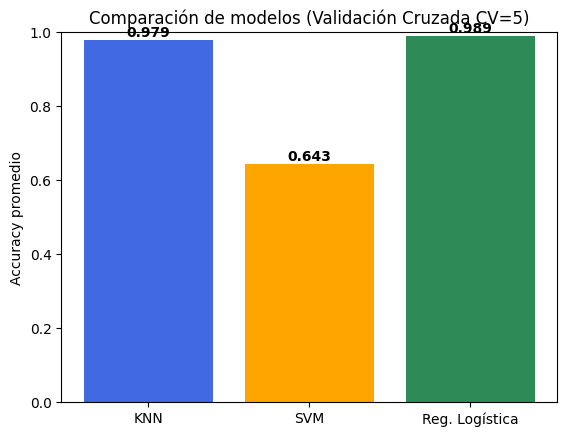

In [21]:
import matplotlib.pyplot as plt

models = ['KNN', 'SVM', 'Reg. Logística']
means = [0.979, 0.643, 0.989]  # tus promedios actuales
colors = ['royalblue', 'orange', 'seagreen']

plt.bar(models, means, color=colors)
plt.title('Comparación de modelos (Validación Cruzada CV=5)')
plt.ylabel('Accuracy promedio')
plt.ylim(0, 1)
for i, v in enumerate(means):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


### Escalamiento

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Regresión Logística con escalado y más iteraciones
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr_scores_scaled = cross_val_score(lr_pipe, X, y, cv=5, scoring='accuracy')

print("Regresión Logística (escalada) CV Scores:", lr_scores_scaled)
print("Promedio de accuracy:", lr_scores_scaled.mean())

# SVM con escalado (también se beneficia)
svm_pipe = make_pipeline(StandardScaler(), SVC())
svm_scores_scaled = cross_val_score(svm_pipe, X, y, cv=5, scoring='accuracy')

print("\nSVM (escalado) CV Scores:", svm_scores_scaled)
print("Promedio de accuracy:", svm_scores_scaled.mean())


Regresión Logística (escalada) CV Scores: [0.9625     0.98333333 0.9875     1.         0.97083333]
Promedio de accuracy: 0.9808333333333333

SVM (escalado) CV Scores: [0.9625     0.975      0.98333333 0.9        0.975     ]
Promedio de accuracy: 0.9591666666666667


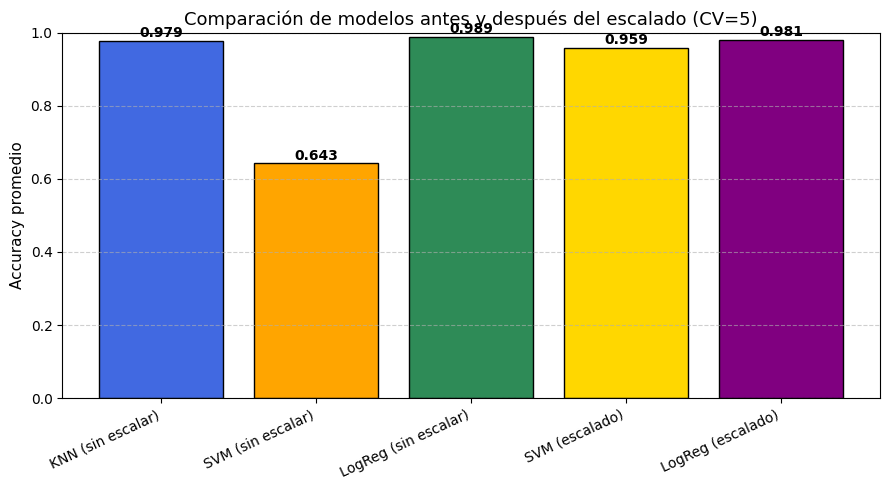

In [23]:
# Promedios de accuracy (usa tus valores reales)
acc_knn = 0.979     # KNN sin escalado
acc_svm = 0.643     # SVM sin escalado
acc_lr  = 0.989     # Regresión Logística sin escalado

# Resultados con escalado (usa los que obtuviste en tu salida)
acc_svm_scaled = svm_scores_scaled.mean()
acc_lr_scaled  = lr_scores_scaled.mean()

# Configuración de gráfico
models = ['KNN (sin escalar)', 'SVM (sin escalar)', 'LogReg (sin escalar)',
          'SVM (escalado)', 'LogReg (escalado)']
means = [acc_knn, acc_svm, acc_lr, acc_svm_scaled, acc_lr_scaled]
colors = ['royalblue', 'orange', 'seagreen', 'gold', 'purple']

plt.figure(figsize=(9, 5))
bars = plt.bar(models, means, color=colors, edgecolor='black')

plt.title('Comparación de modelos antes y después del escalado (CV=5)', fontsize=13)
plt.ylabel('Accuracy promedio', fontsize=11)
plt.ylim(0, 1)
plt.xticks(rotation=25, ha='right')

# Etiquetas con los valores
for i, v in enumerate(means):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()